In [1]:
#Ignore 'Future Warnings'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set Base for Algorithms

In [2]:
#Import Necessary Packages
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
#Set Psudeorandom Seed
seed = 42

In [4]:
#Models to be used
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RTREE', RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)))
models.append(('XTREE', xgb.XGBRFClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

methods = []
for name, model in models:
    methods.append(name)

# Assessment of Base Specification

In [5]:
# Load dataset
files = []

files.append(('One Year Base','../data/1y_offset.xlsx'))
files.append(('Two Year Base','../data/2y_offset.xlsx'))
files.append(('Three Year Base','../data/3y_offset.xlsx'))
files.append(('Five Year Base','../data/5y_offset.xlsx'))
files.append(('Ten Year Base','../data/10y_offset.xlsx'))

## Base Specification

In [6]:
df_b_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_b_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_b_f = pd.DataFrame(methods, columns = ['Algorithm'])

In [7]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
   
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
      
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_b_a[name] = accuracy
    df_b_r[name] = recall
    df_b_f[name] = f1

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:33<00:00,  6.62s/it]


## Base Specification w/ PCA

In [8]:
df_bp_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_bp_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_bp_f = pd.DataFrame(methods, columns = ['Algorithm'])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:35<00:00,  7.08s/it]


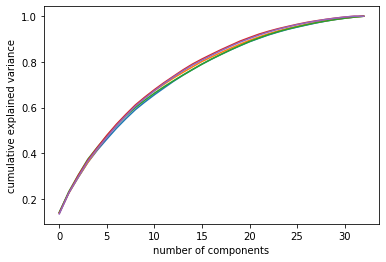

In [9]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    pca = PCA().fit(X_train)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_bp_a[name] = accuracy
    df_bp_r[name] = recall
    df_bp_f[name] = f1

## Base Specification w/ Y/R/C dummies

In [10]:
df_bd_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_bd_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_bd_f = pd.DataFrame(methods, columns = ['Algorithm'])

In [11]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    #Creation of Year/Region/Country Dummies
    year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
    region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
    country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]
    
    df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
      
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_bd_a[name] = accuracy
    df_bd_r[name] = recall
    df_bd_f[name] = f1

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:40<00:00, 20.11s/it]


## Base Specification w/ PCA and Y/R/C dummies

In [12]:
df_bpd_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_bpd_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_bpd_f = pd.DataFrame(methods, columns = ['Algorithm'])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:02<00:00, 24.48s/it]


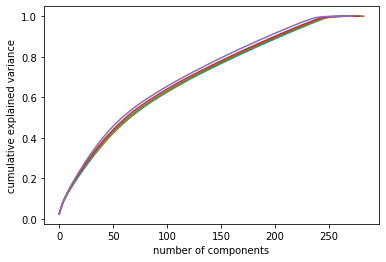

In [13]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    #Creation of Year/Region/Country Dummies
    year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
    region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
    country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]
    
    df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    pca = PCA().fit(X_train)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_bpd_a[name] = accuracy
    df_bpd_r[name] = recall
    df_bpd_f[name] = f1

# Assessment of Alternative Specification

In [14]:
# Load dataset
files = []

files.append(('One Year Alt','../data/1a_offset.xlsx'))
files.append(('Two Year Alt','../data/2a_offset.xlsx'))
files.append(('Three Year Alt','../data/3a_offset.xlsx'))
files.append(('Five Year Alt','../data/5a_offset.xlsx'))
files.append(('Ten Year Alt','../data/10a_offset.xlsx'))

## Alternative Specification

In [15]:
df_a_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_a_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_a_f = pd.DataFrame(methods, columns = ['Algorithm'])

In [16]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
     
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_a_a[name] = accuracy
    df_a_r[name] = recall
    df_a_f[name] = f1

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:42<00:00,  8.49s/it]


## Alternative Specification w/ PCA

In [17]:
df_ap_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_ap_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_ap_f = pd.DataFrame(methods, columns = ['Algorithm'])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:37<00:00,  7.46s/it]


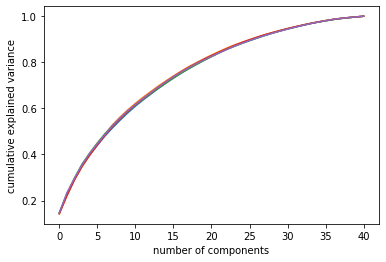

In [18]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
     
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    pca = PCA().fit(X_train)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_ap_a[name] = accuracy
    df_ap_r[name] = recall
    df_ap_f[name] = f1

## Alternative Specification w/ Y/R/C dummies

In [19]:
df_ad_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_ad_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_ad_f = pd.DataFrame(methods, columns = ['Algorithm'])

In [20]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    #Creation of Year/Region/Country Dummies
    year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
    region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
    country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]
    
    df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_ad_a[name] = accuracy
    df_ad_r[name] = recall
    df_ad_f[name] = f1

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:44<00:00, 20.93s/it]


## Alternative Specification w/ Y/R/C dummies and PCA

In [21]:
df_apd_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_apd_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_apd_f = pd.DataFrame(methods, columns = ['Algorithm'])

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:16<00:00, 27.23s/it]


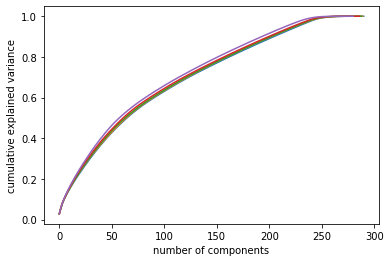

In [22]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    #Creation of Year/Region/Country Dummies
    year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
    region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
    country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]
    
    df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    pca = PCA().fit(X_train)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_apd_a[name] = accuracy
    df_apd_r[name] = recall
    df_apd_f[name] = f1

# Assessment of Conflict Type on Alternative Specification

In [23]:
files = []

files.append(('State Based','../data/con_1.xlsx'))
files.append(('Non State','../data/con_2.xlsx'))
files.append(('One Sided','../data/con_3.xlsx'))

## Con Type Specification

In [24]:
df_c_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_c_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_c_f = pd.DataFrame(methods, columns = ['Algorithm'])

In [25]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
 
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
 
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_c_a[name] = accuracy
    df_c_r[name] = recall
    df_c_f[name] = f1

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:31<00:00, 10.39s/it]


## Con Type Specification w/  PCA

In [26]:
df_cp_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_cp_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_cp_f = pd.DataFrame(methods, columns = ['Algorithm'])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:25<00:00,  8.44s/it]


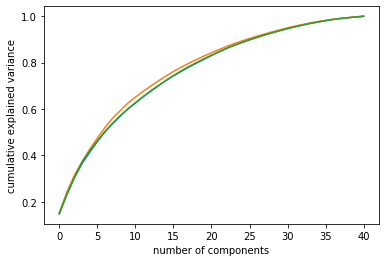

In [27]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])

    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    pca = PCA().fit(X_train)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_cp_a[name] = accuracy
    df_cp_r[name] = recall
    df_cp_f[name] = f1

## Con Type Specification w/ Y/R/C

In [28]:
df_cd_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_cd_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_cd_f = pd.DataFrame(methods, columns = ['Algorithm'])

In [29]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    #Creation of Year/Region/Country Dummies
    year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
    region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
    country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]
    
    df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_cd_a[name] = accuracy
    df_cd_r[name] = recall
    df_cd_f[name] = f1

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:18<00:00, 26.18s/it]


## Con Type Specification w/ Y/R/C dummies and PCA

In [30]:
df_cpd_a = pd.DataFrame(methods, columns = ['Algorithm'])
df_cpd_r = pd.DataFrame(methods, columns = ['Algorithm'])
df_cpd_f = pd.DataFrame(methods, columns = ['Algorithm'])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:31<00:00, 30.64s/it]


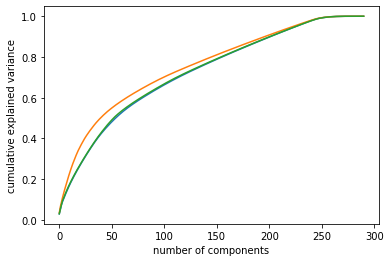

In [31]:
for name, file in tqdm(files):
    #print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    
    #Creation of Year/Region/Country Dummies
    year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
    region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
    country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]
    
    df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)
    
    accuracy = []
    recall = []
    f1 = []    
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = seed) 
    X_train, Y_train = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    pca = PCA().fit(X_train)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    for algo, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(round(accuracy_score(Y_test, predictions),2))
        recall.append(round(recall_score(Y_test, predictions),2))
        f1.append(round(f1_score(Y_test, predictions),2))
    df_cpd_a[name] = accuracy
    df_cpd_r[name] = recall
    df_cpd_f[name] = f1

In [33]:
#save to excel file

df_b_a.to_excel('../data/b_a.xlsx')
df_b_r.to_excel('../data/b_r.xlsx')
df_b_f.to_excel('../data/b_f.xlsx')

df_a_a.to_excel('../data/a_a.xlsx')
df_a_r.to_excel('../data/a_r.xlsx')
df_a_f.to_excel('../data/a_f.xlsx')

df_c_a.to_excel('../data/c_a.xlsx')
df_c_r.to_excel('../data/c_r.xlsx')
df_c_f.to_excel('../data/c_f.xlsx')

df_bp_a.to_excel('../data/bp_a.xlsx')
df_bp_r.to_excel('../data/bp_r.xlsx')
df_bp_f.to_excel('../data/bp_f.xlsx')

df_ap_a.to_excel('../data/ap_a.xlsx')
df_ap_r.to_excel('../data/ap_r.xlsx')
df_ap_f.to_excel('../data/ap_f.xlsx')

df_cp_a.to_excel('../data/cp_a.xlsx')
df_cp_r.to_excel('../data/cp_r.xlsx')
df_cp_f.to_excel('../data/cp_f.xlsx')

df_bd_a.to_excel('../data/bd_a.xlsx')
df_bd_r.to_excel('../data/bd_r.xlsx')
df_bd_f.to_excel('../data/bd_f.xlsx')

df_ad_a.to_excel('../data/ad_a.xlsx')
df_ad_r.to_excel('../data/ad_r.xlsx')
df_ad_f.to_excel('../data/ad_f.xlsx')

df_cd_a.to_excel('../data/cd_a.xlsx')
df_cd_r.to_excel('../data/cd_r.xlsx')
df_cd_f.to_excel('../data/cd_f.xlsx')

df_bpd_a.to_excel('../data/bpd_a.xlsx')
df_bpd_r.to_excel('../data/bpd_r.xlsx')
df_bpd_f.to_excel('../data/bpd_f.xlsx')

df_apd_a.to_excel('../data/apd_a.xlsx')
df_apd_r.to_excel('../data/apd_r.xlsx')
df_apd_f.to_excel('../data/apd_f.xlsx')

df_cpd_a.to_excel('../data/cpd_a.xlsx')
df_cpd_r.to_excel('../data/cpd_r.xlsx')
df_cpd_f.to_excel('../data/cpd_f.xlsx')